<a href="https://colab.research.google.com/github/barazidan0/MLOps_Project/blob/main/eda_of_netflix_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading csv

In [ ]:
url = 'https://raw.githubusercontent.com/barazidan0/MLOps_Project/refs/heads/main/titles.csv'

In [ ]:
df= pd.read_csv(url)
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [ ]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


# Data cleaning

In [ ]:
df["seasons"]=df["seasons"].fillna(0)
df["imdb_score"]=df["imdb_score"].fillna(df["imdb_score"].mean())
df["imdb_votes"]=df["imdb_votes"].fillna(df["imdb_votes"].median())
df["tmdb_popularity"]=df["tmdb_popularity"].fillna(df["tmdb_popularity"].median())
df["tmdb_score"]=df["tmdb_score"].fillna(df["tmdb_score"].mean())
df2=df.drop(["imdb_id","description","age_certification"], axis=1)
df2.head()

,id,title,type,release_year,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,51,['documentation'],['US'],1.0,6.510861,2233.5,0.600,6.829175
1,tm84618,Taxi Driver,MOVIE,1976,114,"['drama', 'crime']",['US'],0.0,8.200000,808582.0,40.965,8.179000
2,tm154986,Deliverance,MOVIE,1972,109,"['drama', 'action', 'thriller', 'european']",['US'],0.0,7.700000,107673.0,10.010,7.300000
3,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"['fantasy', 'action', 'comedy']",['GB'],0.0,8.200000,534486.0,15.461,7.811000
4,tm120801,The Dirty Dozen,MOVIE,1967,150,"['war', 'action']","['GB', 'US']",0.0,7.700000,72662.0,20.398,7.600000


In [ ]:
df2=df2.dropna()

In [ ]:
df2.isna().sum()

,0
id,0
title,0
type,0
release_year,0
runtime,0
genres,0
production_countries,0
seasons,0
imdb_score,0
imdb_votes,0


In [ ]:
#df.to_csv('netflix_cleaned.csv', index=False)

In [ ]:
df2.shape

(5849, 12)

In [ ]:
vc=df2["type"].value_counts()
vc

,count
type,
MOVIE,3743
SHOW,2106


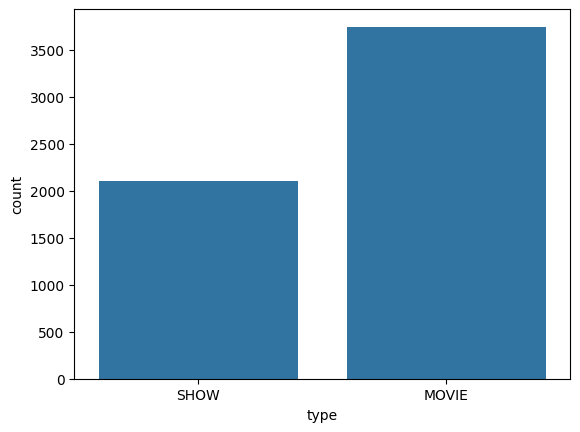

<Figure size 600x600 with 0 Axes>

In [ ]:
sns.countplot(data= df2, x="type")
plt.figure(figsize= (6,6), label=vc)
plt.show()

In [ ]:
df2.dtypes

,0
id,object
title,object
type,object
release_year,int64
runtime,int64
genres,object
production_countries,object
seasons,float64
imdb_score,float64
imdb_votes,float64


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5849 entries, 0 to 5849
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5849 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5849 non-null   object 
 3   release_year          5849 non-null   int64  
 4   runtime               5849 non-null   int64  
 5   genres                5849 non-null   object 
 6   production_countries  5849 non-null   object 
 7   seasons               5849 non-null   float64
 8   imdb_score            5849 non-null   float64
 9   imdb_votes            5849 non-null   float64
 10  tmdb_popularity       5849 non-null   float64
 11  tmdb_score            5849 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 594.0+ KB


In [ ]:
df2.drop_duplicates()

,id,title,type,release_year,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,51,['documentation'],['US'],1.0,6.510861,2233.5,0.600,6.829175
1,tm84618,Taxi Driver,MOVIE,1976,114,"['drama', 'crime']",['US'],0.0,8.200000,808582.0,40.965,8.179000
2,tm154986,Deliverance,MOVIE,1972,109,"['drama', 'action', 'thriller', 'european']",['US'],0.0,7.700000,107673.0,10.010,7.300000
3,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"['fantasy', 'action', 'comedy']",['GB'],0.0,8.200000,534486.0,15.461,7.811000
4,tm120801,The Dirty Dozen,MOVIE,1967,150,"['war', 'action']","['GB', 'US']",0.0,7.700000,72662.0,20.398,7.600000
...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,2021,100,"['romance', 'drama']",['NG'],0.0,6.800000,45.0,1.466,6.829175
5846,tm898842,C/O Kaadhal,MOVIE,2021,134,['drama'],[],0.0,7.700000,348.0,6.821,6.829175
5847,tm1059008,Lokillo,MOVIE,2021,90,['comedy'],['CO'],0.0,3.800000,68.0,26.005,6.300000
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,2021,37,[],['US'],0.0,6.510861,2233.5,1.296,10.000000


In [ ]:
df2["genres"]=df2["genres"].to_numpy().astype(str)
df2["production_countries"]=df2["production_countries"].to_numpy().astype(str)
df2

,id,title,type,release_year,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,51,['documentation'],['US'],1.0,6.510861,2233.5,0.600,6.829175
1,tm84618,Taxi Driver,MOVIE,1976,114,"['drama', 'crime']",['US'],0.0,8.200000,808582.0,40.965,8.179000
2,tm154986,Deliverance,MOVIE,1972,109,"['drama', 'action', 'thriller', 'european']",['US'],0.0,7.700000,107673.0,10.010,7.300000
3,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"['fantasy', 'action', 'comedy']",['GB'],0.0,8.200000,534486.0,15.461,7.811000
4,tm120801,The Dirty Dozen,MOVIE,1967,150,"['war', 'action']","['GB', 'US']",0.0,7.700000,72662.0,20.398,7.600000
...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,2021,100,"['romance', 'drama']",['NG'],0.0,6.800000,45.0,1.466,6.829175
5846,tm898842,C/O Kaadhal,MOVIE,2021,134,['drama'],[],0.0,7.700000,348.0,6.821,6.829175
5847,tm1059008,Lokillo,MOVIE,2021,90,['comedy'],['CO'],0.0,3.800000,68.0,26.005,6.300000
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,2021,37,[],['US'],0.0,6.510861,2233.5,1.296,10.000000


In [ ]:
df2.dtypes

,0
id,object
title,object
type,object
release_year,int64
runtime,int64
genres,object
production_countries,object
seasons,float64
imdb_score,float64
imdb_votes,float64


# Action movies

In [ ]:
df2[df2["genres"].str.contains('action')]

,id,title,type,release_year,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2,tm154986,Deliverance,MOVIE,1972,109,"['drama', 'action', 'thriller', 'european']",['US'],0.0,7.7,107673.0,10.010,7.300000
3,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"['fantasy', 'action', 'comedy']",['GB'],0.0,8.2,534486.0,15.461,7.811000
4,tm120801,The Dirty Dozen,MOVIE,1967,150,"['war', 'action']","['GB', 'US']",0.0,7.7,72662.0,20.398,7.600000
7,tm14873,Dirty Harry,MOVIE,1971,102,"['thriller', 'action', 'crime']",['US'],0.0,7.7,155051.0,12.817,7.500000
8,tm119281,Bonnie and Clyde,MOVIE,1967,110,"['crime', 'drama', 'action']",['US'],0.0,7.7,112048.0,15.687,7.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
5733,ts289982,Bangkok Breaking,SHOW,2021,60,"['thriller', 'action', 'crime', 'drama']",['TH'],1.0,5.8,294.0,28.627,7.000000
5738,ts317709,Kayko and Kokosh,SHOW,2021,15,"['animation', 'comedy', 'fantasy', 'action']",['PL'],2.0,6.3,324.0,3.432,6.700000
5770,tm1098060,Shadow Parties,MOVIE,2021,116,"['action', 'drama', 'thriller']",['NG'],0.0,6.2,9.0,1.286,6.829175
5794,tm986017,Gatao: The Last Stray,MOVIE,2021,120,"['action', 'crime', 'drama', 'romance']",['TW'],0.0,5.9,266.0,3.141,4.900000


# EXPLORATORY DATA ANALYSIS

# Univariate analysis

<Axes: >

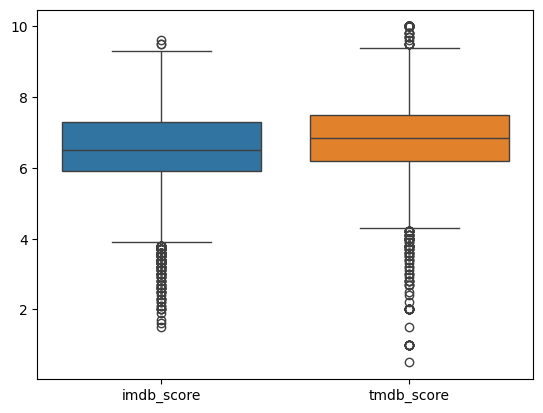

In [ ]:
sns.boxplot(df2[['imdb_score','tmdb_score']])

Terdapat banyak outlier pada imdb_score dan tmdb_score di seluruh dataset.

<Axes: ylabel='production_countries'>

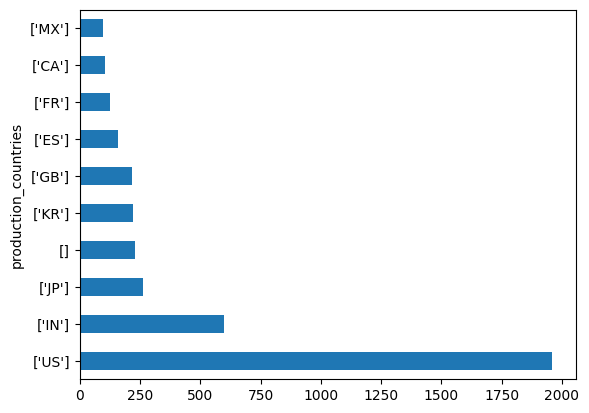

In [ ]:
df2["production_countries"].value_counts()[:10].plot(kind='barh')

Amerika Serikat, India, dan Jepang merupakan tiga negara produksi Netflix teratas.



# MOVIE & SHOW distribution in India

<Axes: xlabel='type'>

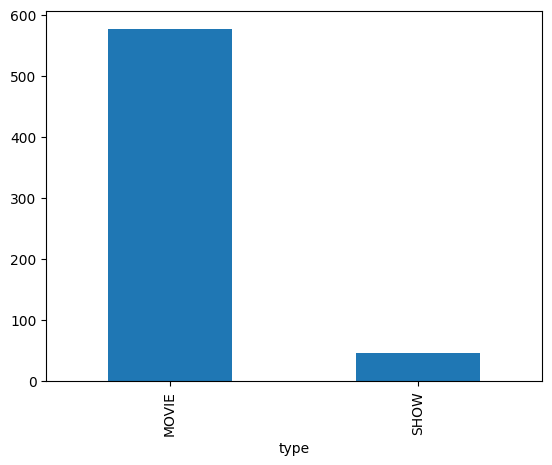

In [ ]:
df2[df2["production_countries"].str.contains('IN')].type.value_counts().plot(kind='bar')

 split dataframe kedalam MOVIE & SHOW types.

# dfm is for MOVIES and dfs is for SHOWS

In [ ]:
dfm=df2[df2["type"]=="MOVIE"]
dfs=df2[df2["type"]=="SHOW"]

# Frequency plot of number of seasons

<Axes: xlabel='seasons'>

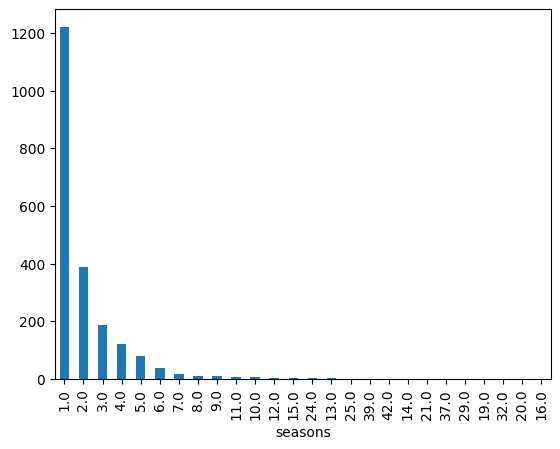

In [ ]:
dfs["seasons"].value_counts().plot(kind='bar')

Sebagian besar show hanya memiliki 1 musim, sepertiganya memiliki 2 musim, dan setengah dari jumlah tersebut memiliki 3 musim.

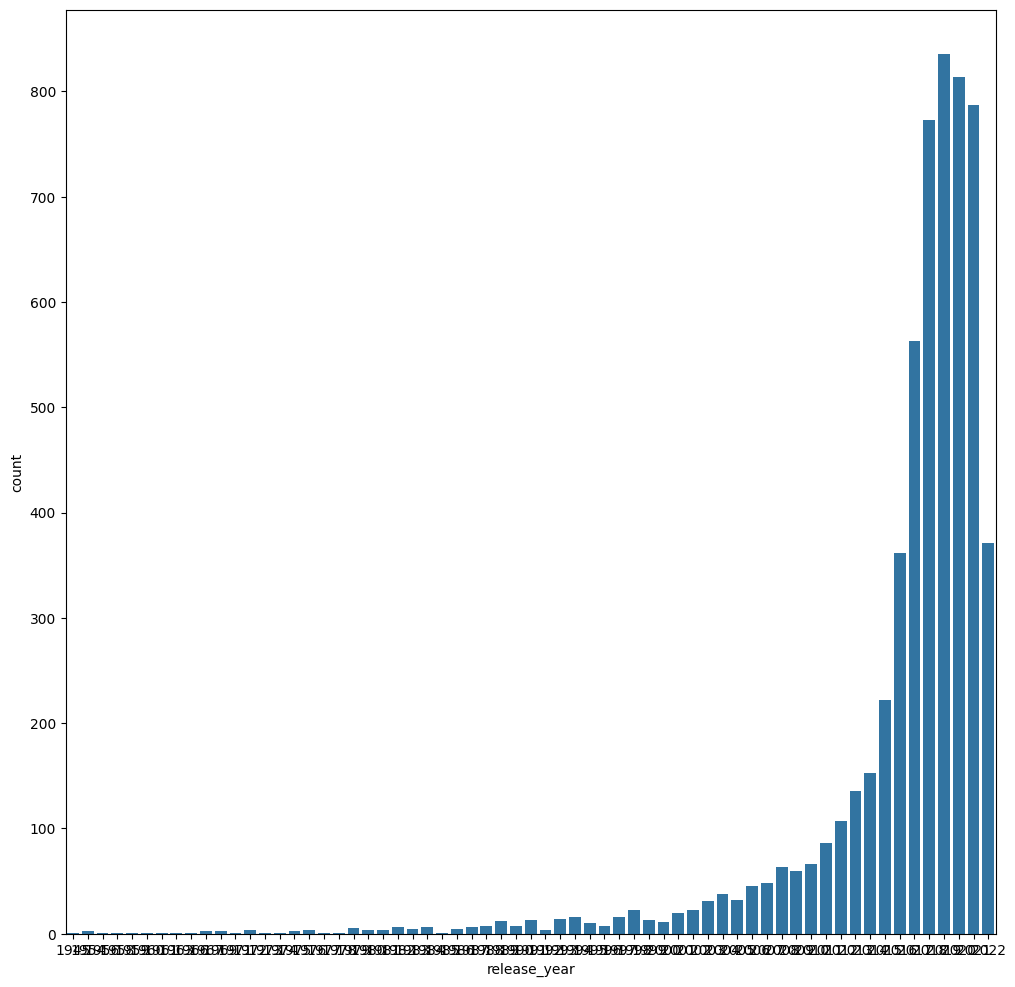

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x='release_year', data=df2)
plt.show()

Terdapat pertumbuhan signifikan dalam jumlah konten yang dibuat atau dirilis dalam 5 tahun terakhir.

# BIVARIATE ANALYSIS

# Scatterplot

<Axes: xlabel='imdb_score', ylabel='tmdb_score'>

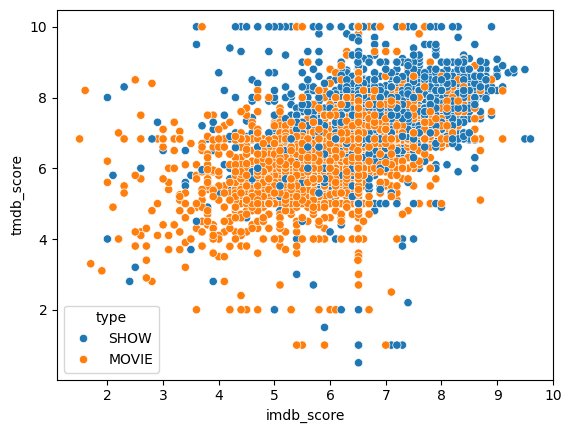

In [ ]:
sns.scatterplot(x="imdb_score", y="tmdb_score", hue="type", data=df2)

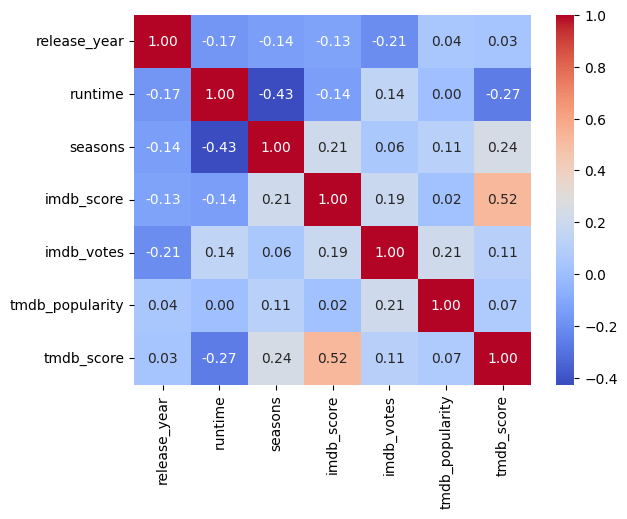

In [ ]:
cm = df2.drop(['id', 'title', 'genres', 'production_countries', 'type'], axis=1)
sns.heatmap(cm.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Secara umum, Show cenderung memiliki imdb score dan tmdb score yang lebih tinggi dibandingkan Movie.

<Figure size 1200x1200 with 0 Axes>

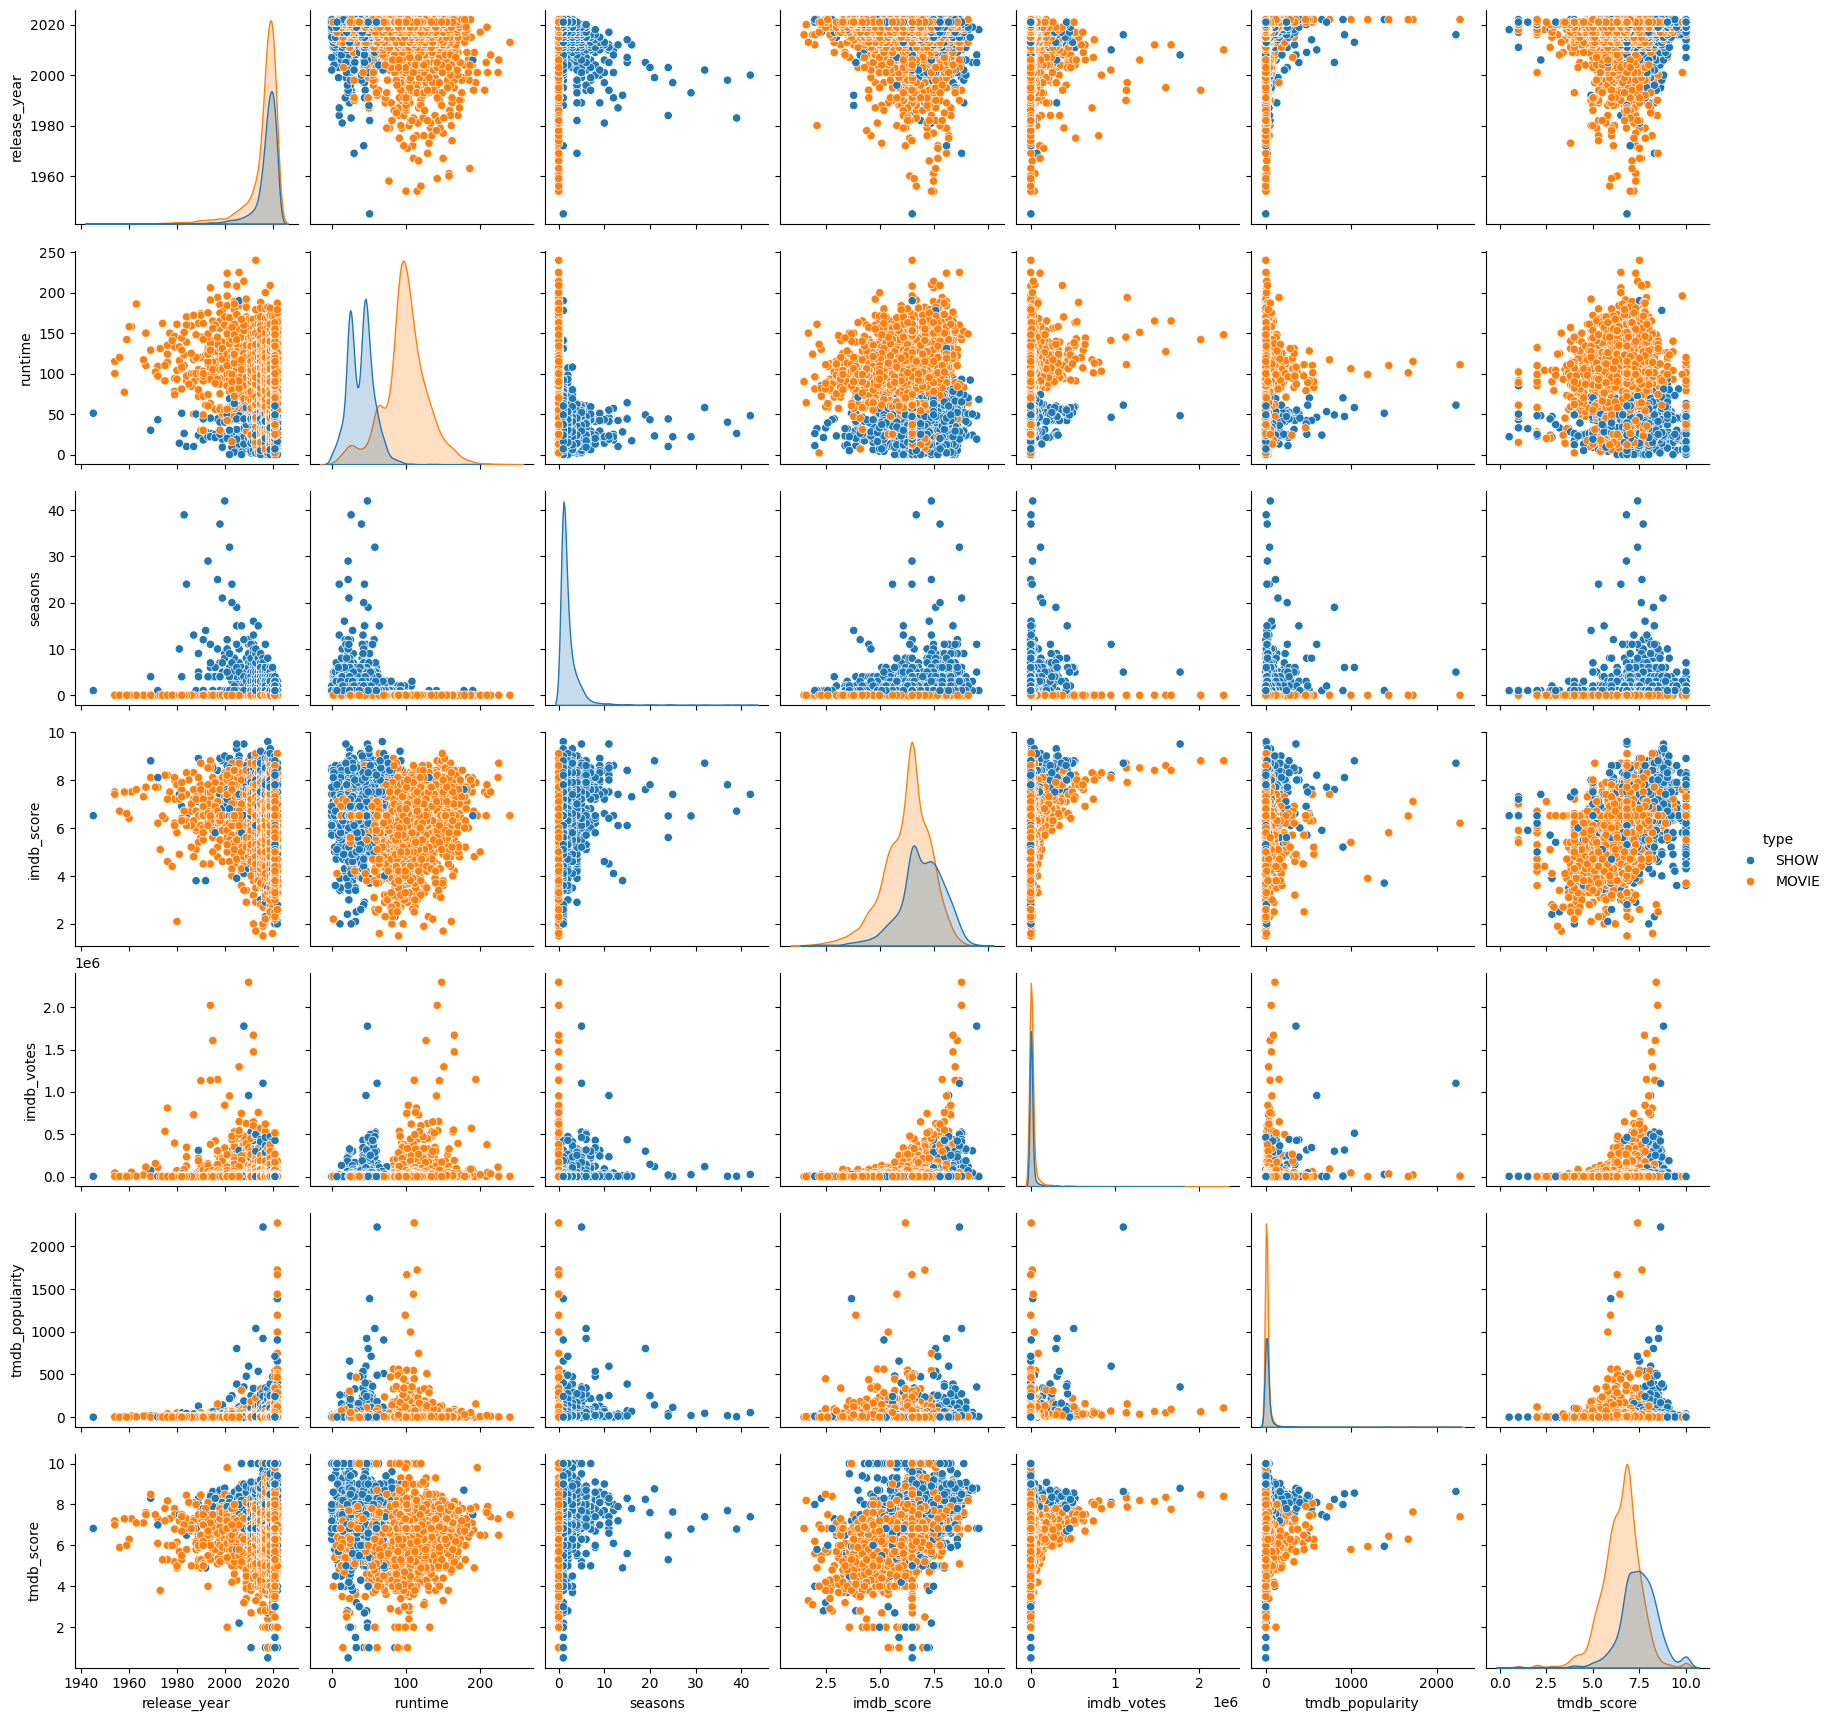

In [ ]:
plt.figure(figsize=(12,12))
sns.pairplot(data=df2, hue="type")
plt.show()

Pairplot ini memberikan beberapa insight utama terkait Show dan Movie:

1.  Terdapat peningkatan signifikan baik pada Show maupun Movie dalam 5 tahun terakhir.
2. tmdb_popularity untuk Movie secara signifikan lebih tinggi dibandingkan Show.
3. imdb_score dan tmdb_score untuk Movie relatif lebih rendah.
4. Durasi tayang (runtime) untuk Movie umumnya lebih panjang dibandingkan sebagian besar Show.

KESIMPULAN

Amerika Serikat, India, dan Jepang merupakan tiga negara produksi Netflix terbesar.
Terdapat peningkatan signifikan baik pada Show maupun Movie dalam 5 tahun terakhir.
tmdb_popularity untuk Movie secara signifikan lebih tinggi dibandingkan Show.
imdb_score dan tmdb_score untuk Movie relatif lebih rendah dibandingkan Show.


In [ ]:
pre_df = df2[['title', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']]
pre_df.head(5)

,title,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,Five Came Back: The Reference Films,6.510861,2233.5,0.600,6.829175
1,Taxi Driver,8.200000,808582.0,40.965,8.179000
2,Deliverance,7.700000,107673.0,10.010,7.300000
3,Monty Python and the Holy Grail,8.200000,534486.0,15.461,7.811000
4,The Dirty Dozen,7.700000,72662.0,20.398,7.600000


In [ ]:
pre_df.describe()

,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5849.000000,5.849000e+03,5849.000000,5849.000000
mean,6.510861,2.163748e+04,22.394546,6.829175
std,1.114937,9.184893e+04,81.072685,1.138948
min,1.500000,5.000000e+00,0.009442,0.500000
25%,5.900000,6.040000e+02,2.765000,6.200000
50%,6.510861,2.233500e+03,6.821000,6.829175
75%,7.300000,7.982000e+03,16.244000,7.500000
max,9.600000,2.294231e+06,2274.044000,10.000000


In [ ]:
pre_df['imdb_votes'] = np.log(pre_df['imdb_votes'] + 1)
pre_df['tmdb_popularity'] = np.log(pre_df['tmdb_popularity'] + 1)
pre_df.describe()

<ipython-input-29-2412109229>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df['imdb_votes'] = np.log(pre_df['imdb_votes'] + 1)
<ipython-input-29-2412109229>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df['tmdb_popularity'] = np.log(pre_df['tmdb_popularity'] + 1)


,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5849.000000,5849.000000,5849.000000,5849.000000
mean,6.510861,7.724431,2.213099,6.829175
std,1.114937,2.134440,1.134910,1.138948
min,1.500000,1.791759,0.009397,0.500000
25%,5.900000,6.405228,1.325748,6.200000
50%,6.510861,7.711773,2.056812,6.829175
75%,7.300000,8.985070,2.847464,7.500000
max,9.600000,14.645909,7.729755,10.000000


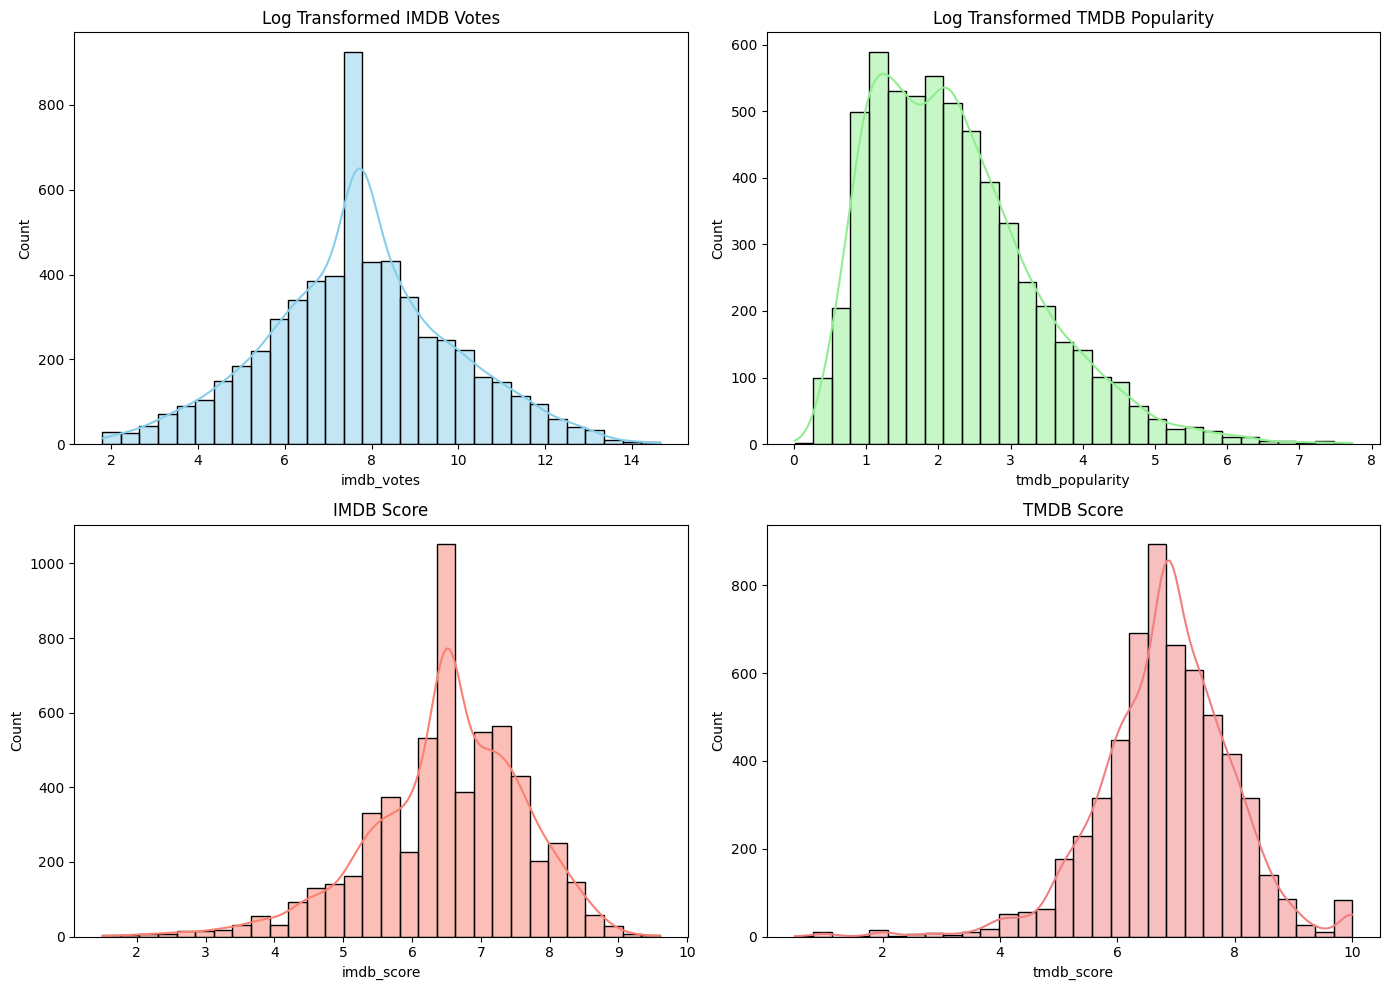

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Ensure numpy is imported for np.log

# Plot histograms to see the distribution
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Histograms for transformed data
# Use pre_df and the correct column names after transformation
sns.histplot(pre_df['imdb_votes'], bins=30, kde=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Log Transformed IMDB Votes')

sns.histplot(pre_df['tmdb_popularity'], bins=30, kde=True, ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title('Log Transformed TMDB Popularity')

# These plots are for the original (or cleaned) scores, which are still in pre_df
sns.histplot(pre_df['imdb_score'], bins=30, kde=True, ax=axs[1, 0], color='salmon')
axs[1, 0].set_title('IMDB Score')

sns.histplot(pre_df['tmdb_score'], bins=30, kde=True, ax=axs[1, 1], color='lightcoral')
axs[1, 1].set_title('TMDB Score')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# (1) Asumsikan df2 sudah ada dari sebelumnya, gunakan pre_df:
pre_df = df2[['title', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']].copy()

# (2) Log Transform (sudah kamu lakukan, saya rapihkan pakai .loc untuk hindari warning)
pre_df.loc[:, 'imdb_votes'] = np.log(pre_df['imdb_votes'] + 1)
pre_df.loc[:, 'tmdb_popularity'] = np.log(pre_df['tmdb_popularity'] + 1)

# (3) Buat target label untuk klasifikasi, misalnya: imdb_score di atas median
threshold = pre_df['imdb_score'].median()
pre_df['target'] = (pre_df['imdb_score'] > threshold).astype(int)

# (4) Pisahkan fitur dan target
features = ['imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']
X = pre_df[features]
y = pre_df['target']

# (5) Scaling fitur numerik pakai StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert ke dataframe kembali untuk kemudahan
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# (6) Split data sebelum balancing
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# (7) Balancing data training dengan SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# (8) Cek hasil balancing
print("Distribusi sebelum balancing:", y_train.value_counts())
print("Distribusi sesudah balancing:", pd.Series(y_train_bal).value_counts())


Distribusi sebelum balancing: target
0    2463
1    2216
Name: count, dtype: int64
Distribusi sesudah balancing: target
1    2463
0    2463
Name: count, dtype: int64
